In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from itertools import combinations
from scipy.stats import linregress


#python -m pip install numpy scikit-learn statsmodels

In [13]:
path = "..\\DataSet_Riva_garda.csv"
start_date="01/01/2013"         #"dd/mm/yy"
end_date="01/06/2020"           #"dd/mm/yy"



DATASET: RIVA
[('PM10', 'Nitrogen dioxide'), ('PM10', 'Ozone'), ('PM10', 'Air_humidity'), ('PM10', 'Sol_rad'), ('PM10', 'Temperature'), ('PM10', 'Wind_speed'), ('Nitrogen dioxide', 'Ozone'), ('Nitrogen dioxide', 'Air_humidity'), ('Nitrogen dioxide', 'Sol_rad'), ('Nitrogen dioxide', 'Temperature'), ('Nitrogen dioxide', 'Wind_speed'), ('Ozone', 'Air_humidity'), ('Ozone', 'Sol_rad'), ('Ozone', 'Temperature'), ('Ozone', 'Wind_speed'), ('Air_humidity', 'Sol_rad'), ('Air_humidity', 'Temperature'), ('Air_humidity', 'Wind_speed'), ('Sol_rad', 'Temperature'), ('Sol_rad', 'Wind_speed'), ('Temperature', 'Wind_speed')]


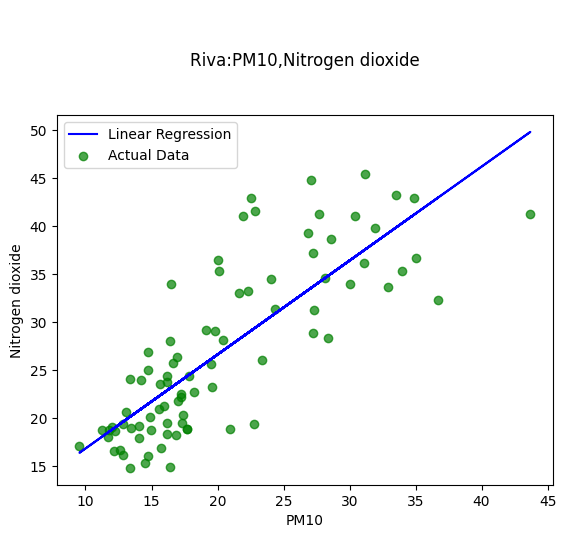

LinregressResult(slope=0.9786104702000534, intercept=7.002335284840761, rvalue=0.807171351138688, pvalue=1.832424783452682e-20, stderr=0.07903557884269773, intercept_stderr=1.7049656655797123)


In [14]:
station_list=[]
coppie=[]

Appa=pd.read_csv(
path,
na_values="n.d."
)

print("\n\nDATASET: RIVA")

gas_list=Appa.columns.values
Appa["Data"]=pd.to_datetime(Appa["Data"])
Appa.sort_values(by="Data", inplace=True)
Appa=Appa.set_index("Data",drop=True)
Appa = Appa.resample("M").mean()
Appa=Appa[start_date:end_date]

gas_list=gas_list[2:9]

coppie=list(combinations(gas_list, 2))
print(coppie)
    
for gas_1 , gas_2 in coppie:

    #print(gas_1+" + "+gas_2)
    LR =LinearRegression()
    LR.fit(Appa[gas_1].values.reshape(-1,1),Appa[gas_2].values)
    prediction = LR.predict(Appa[gas_1].values.reshape(-1,1))
    plt.plot(Appa[gas_1], prediction, label="Linear Regression", color="b")
    plt.scatter(Appa[gas_1],Appa[gas_2], label="Actual Data", color ="g", alpha=.7)
    plt.legend()
    plt.title("\n\nRiva:"+gas_1+","+gas_2+"\n\n")
    plt.xlabel(gas_1)
    plt.ylabel(gas_2)
    plt.show()
    regress_info=linregress(Appa[gas_1], Appa[gas_2])
    print(linregress(Appa[gas_1], Appa[gas_2]))
    break




In [61]:
eq="y = "+str(round(regress_info.slope,2))+"x + "+str(round(regress_info.intercept,2))
data=[regress_info.slope,regress_info.intercept,regress_info.rvalue,regress_info.pvalue,regress_info.stderr,regress_info.intercept_stderr,eq]
info=["slope","intercept","rvalue","pvalue","stderr","intercept_stderr","Equation"]

regress_table=pd.DataFrame(
    data,
    info,

    
)
regress_table



,0
slope,0.97861
intercept,7.002335
rvalue,0.807171
pvalue,0.0
stderr,0.079036
intercept_stderr,1.704966
Equation,y = 0.98x + 7.0


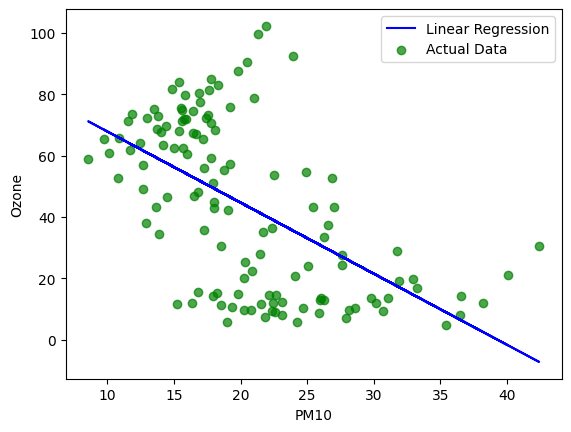

In [5]:
Appa=pd.read_csv(
    "..\\DataSet_APPA_TRENTO\\DataSet_APPA_(2013-2023)\\APPA_2_Parco S. Chiara.csv",
    na_values="n.d."
)

Appa["Data"] = pd.to_datetime(Appa["Data"])  # Convert "Data" column to DateTimeIndex

Appa.sort_values(by="Data", inplace=True)
Appa=Appa.set_index("Data",drop=True)
Appa = Appa.resample("M").mean()

LR =LinearRegression()
LR.fit(Appa["PM10"].values.reshape(-1,1),Appa["Ozone"].values)
prediction = LR.predict(Appa["PM10"].values.reshape(-1,1))
plt.plot(Appa["PM10"], prediction, label= "Linear Regression" , color="b")
plt.scatter(Appa["PM10"],Appa["Ozone"], label="Actual Data", color ="g", alpha=.7)
plt.legend()
plt.xlabel("PM10")
plt.ylabel("Ozone")
plt.show()

